## Footfall Prediction Model

This notebook demonstrates the process of predicting dinner footfall using features like breakfast, lunch, snacks, day, and month.

### Data Preprocessing

We load and inspect the data, handle missing values, encode categorical variables, and split the data into training and testing sets.

### Model Training

Several regression models are trained and cross-validation is used to assess their performance.

### Model Evaluation

The best model is evaluated on the test set and the performance of all models is visualized.

In [2]:

import pandas as pd

# Load the dataset
file_path = 'may_till_aug_file.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()
    

,date,breakfast,lunch,snacks,dinner,day,month
0,01-05-2023 00:00,111,195,108,137,Monday,May
1,02-05-2023 00:00,95,175,115,138,Tuesday,May
2,03-05-2023 00:00,95,203,129,134,Wednesday,May
3,04-05-2023 00:00,93,184,131,179,Thursday,May
4,05-05-2023 00:00,112,121,95,117,Friday,May


In [3]:

# Check for missing values and encode categorical variables
missing_values = data.isnull().sum()
data_encoded = pd.get_dummies(data, columns=['day', 'month'])
data_encoded['year'] = pd.to_datetime(data_encoded['date']).dt.year
if data_encoded['year'].nunique() == 1:
    data_encoded.drop(columns=['date', 'year'], inplace=True)
else:
    data_encoded.drop(columns=['date'], inplace=True)

missing_values, data_encoded.head()
    

(date         0
 breakfast    0
 lunch        0
 snacks       0
 dinner       0
 day          0
 month        0
 dtype: int64,
    breakfast  lunch  snacks  dinner  day_Friday  day_Monday  day_Saturday  \
 0        111    195     108     137           0           1             0   
 1         95    175     115     138           0           0             0   
 2         95    203     129     134           0           0             0   
 3         93    184     131     179           0           0             0   
 4        112    121      95     117           1           0             0   
 
    day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  month_August  \
 0           0             0            0              0             0   
 1           0             0            1              0             0   
 2           0             0            0              1             0   
 3           0             1            0              0             0   
 4           0             0     

In [4]:

from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = data_encoded.drop('dinner', axis=1)
y = data_encoded['dinner']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

In [5]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR()
}

# Dictionary to hold cross-validation scores
cv_scores = {}

# Perform cross-validation and store the results
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores[name] = np.sqrt(-scores)  # Convert MSE to RMSE

cv_scores_sorted = {name: np.mean(score) for name, score in sorted(cv_scores.items(), key=lambda item: np.mean(item[1]))}
cv_scores_sorted
    

{'Lasso Regression': 34.00136262609069,
 'Ridge Regression': 34.66828806430215,
 'Linear Regression': 35.07360519694275,
 'Random Forest': 36.47267491983061,
 'Gradient Boosting': 40.577223730996636,
 'Decision Tree': 49.27948498233154,
 'Support Vector Regression': 97.92621252182117}

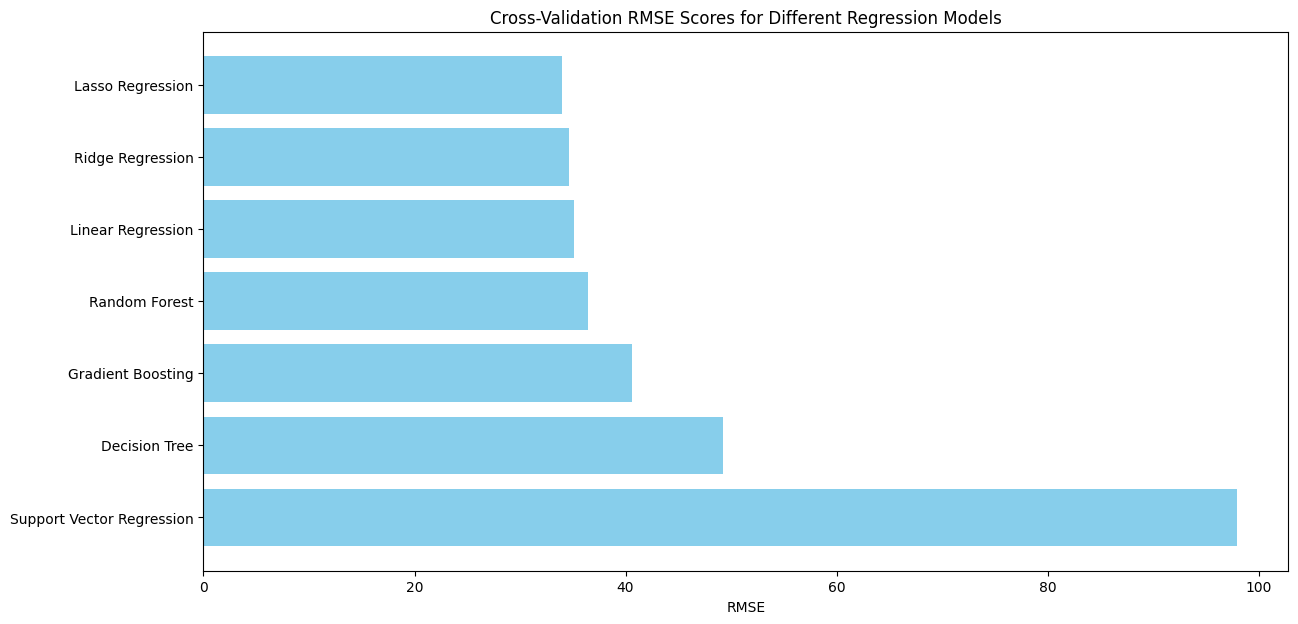

In [6]:

import matplotlib.pyplot as plt

# Let's create a bar graph for the cross-validation RMSE scores
plt.figure(figsize=(14, 7))
plt.barh(list(cv_scores_sorted.keys()), list(cv_scores_sorted.values()), color='skyblue')
plt.xlabel('RMSE')
plt.title('Cross-Validation RMSE Scores for Different Regression Models')
plt.gca().invert_yaxis() 
plt.show()
    

In [7]:

# Train the best model (Lasso Regression) on the full training set
best_model = Lasso()
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
from sklearn.metrics import mean_squared_error

# Predictions
y_pred = best_model.predict(X_test)

# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_rmse
    

25.00661652989949

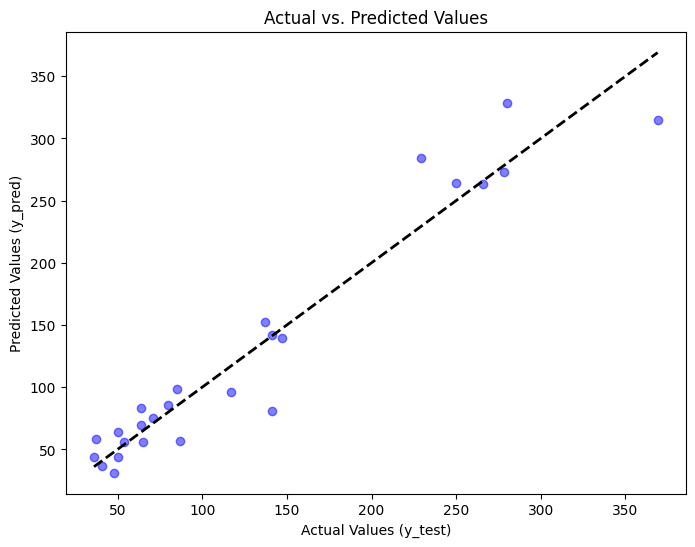

In [8]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")

# Show the plot
plt.show()
